In [50]:
# importing important libraries for Employee Churn Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,  classification_report,precision_score,recall_score


Top 4 rows:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low



Shape: (14999, 10)

Null values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

Number of duplicates: 3008
Shape after dropping duplicates: (11991, 10)


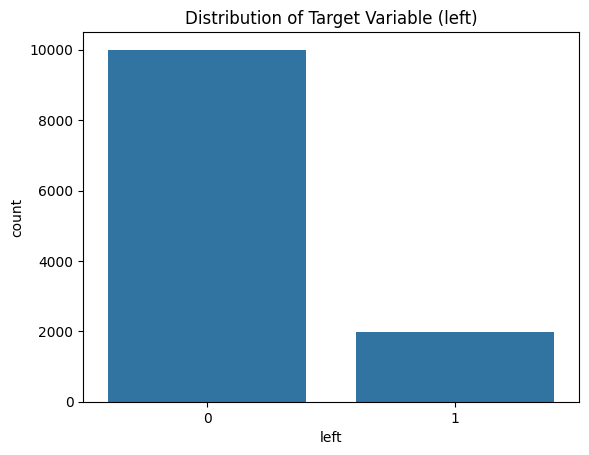

In [4]:
# importing dataset
data = pd.read_csv('HR_Dataset.csv')

# checking the first 5 rows of the dataset
print("Top 4 rows:")
display(data.head(4))

# checking the shape and null values
print("\nShape:", data.shape)
print("\nNull values:\n", data.isnull().sum())

# checking duplicate values
print("\nNumber of duplicates:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", data.shape)  

# visualizing current target distribution
sns.countplot(x='left', data=data)
plt.title('Distribution of Target Variable (left)')
plt.show()


In [ ]:
# store features and target variable
X = data.drop('left', axis=1)
y = data['left']



In [16]:
# column transformation and pipeline
# Correcting column name: the dataset has 'Departments '
preprocessor=ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['satisfaction_level', 
    'last_evaluation', 'number_project', 'average_montly_hours', 
    'time_spend_company','Work_accident', 'promotion_last_5years']),
    ('nominal', OneHotEncoder(), ['Departments ']),
    ('ordinal', OrdinalEncoder(), ['salary']) 
],remainder='passthrough')


In [18]:
# creating the pipeline
pipline=Pipeline([('preprocessor',preprocessor),
                ('model',LogisticRegression())
                 ])

In [19]:
pipline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('nominal', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different

In [21]:
# split data
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
# test the pipe;ine
pipline.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('nominal', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different

In [28]:
# create Prediction
y_pred1=pipline.predict(X_test)

In [29]:
# apply metrics

accuracy_score(y_test,y_pred1)

0.838682784493539

In [31]:
precision_score(y_test,y_pred1)

0.5317919075144508

In [33]:
recall_score(y_test,y_pred1)

0.23115577889447236

Accuracy: 0.838682784493539

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2001
           1       0.53      0.23      0.32       398

    accuracy                           0.84      2399
   macro avg       0.70      0.60      0.62      2399
weighted avg       0.81      0.84      0.81      2399



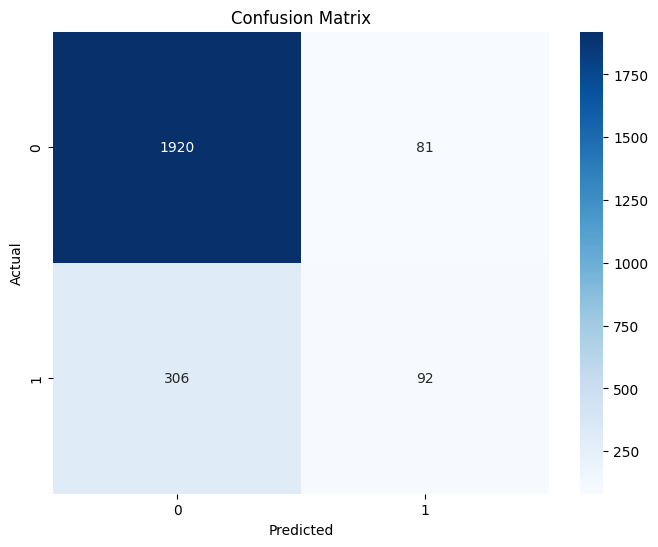

In [36]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("\nClassification Report:\n", classification_report(y_test, y_pred1))

# Confusion Matrix Visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()       

In [59]:
def model_scorer(models):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    for model_name, model in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        print(f"\n{'#'*60}")
        print(f"MODEL: {model_name}")
        print(f"{'#'*60}")
        print(classification_report(y_test, y_pred))


model_dic = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

model_scorer(model_dic)


############################################################
MODEL: Logistic Regression
############################################################
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2001
           1       0.52      0.22      0.31       398

    accuracy                           0.84      2399
   macro avg       0.69      0.59      0.61      2399
weighted avg       0.80      0.84      0.81      2399


############################################################
MODEL: Decision Tree
############################################################
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.89      0.92      0.91       398

    accuracy                           0.97      2399
   macro avg       0.94      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399


###################################################

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Final pipeline (best model)
final_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

# Train on ALL data
final_rf_pipeline.fit(X, y)

print("RandomForest model trained on all data successfully ✅")


RandomForest model trained on all data successfully ✅


In [66]:
# test with sample data
import pandas as pd

# Single synthetic row
single_sample = pd.DataFrame([{
    "satisfaction_level": 0.65,
    "last_evaluation": 0.80,
    "number_project": 4,
    "average_montly_hours": 200,
    "time_spend_company": 3,
    "Work_accident": 0,
    "left": 0,  # remove if using for prediction only
    "promotion_last_5years": 0,
    "Departments": "sales",
    "salary": "medium"
}],index=[0])

single_sample


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.65,0.8,4,200,3,0,0,0,sales,medium


In [69]:
final_rf_pipeline.predict(single_sample)

ValueError: columns are missing: {'Departments '}

In [70]:
# new new
preprocessor=ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['satisfaction_level', 
    'last_evaluation', 'number_project', 'average_montly_hours', 
    'time_spend_company','Work_accident', 'promotion_last_5years']),
    ('nominal', OneHotEncoder(), ['Departments ']),
    ('ordinal', OrdinalEncoder(), ['salary']) 
],remainder='passthrough')


In [72]:
# creating the pipeline
pipline=Pipeline([('preprocessor',preprocessor),
                ('model',RandomForestClassifier(random_state=42))
                 ])

In [74]:
pipline.fit(X,y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('nominal', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different

In [78]:
import pandas as pd

# Single synthetic row
single_sample = pd.DataFrame([{
    "satisfaction_level": 0.65,
    "last_evaluation": 0.80,
    "number_project": 4,
    "average_montly_hours": 200,
    "time_spend_company": 3,
    "Work_accident": 0,
    "left": 0,  # remove if using for prediction only
    "promotion_last_5years": 0,
    "Departments ": "sales",
    "salary": "medium"
}],index=[0])

single_sample


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.65,0.8,4,200,3,0,0,0,sales,medium


In [79]:
result=pipline.predict(single_sample)
if result==1:
    print("The employee will leave")
else:
    print("The employee will stay")

The employee will stay
